In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('wine-red.csv')

In [3]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [4]:
data_information(df)

Data shape  number_rows/number_columns(1599, 12)


Featurs in data sets are:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Statistic view on data 
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur

In [5]:
#df_num is sub set of dataframe that consists only numeric values
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

In [10]:
# function corelation matrix(argument is data_set)
def corr_matrix(data):
    df_num=data.select_dtypes(include=["int64","float64"])
    corr_matrix_origin = df_num.corr(method ='pearson')
    list_col_origin = list(df_num.columns)
    plt.figure(figsize = (15,5))
    ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 15},
                linecolor='black', center=False,  linewidths=.5)

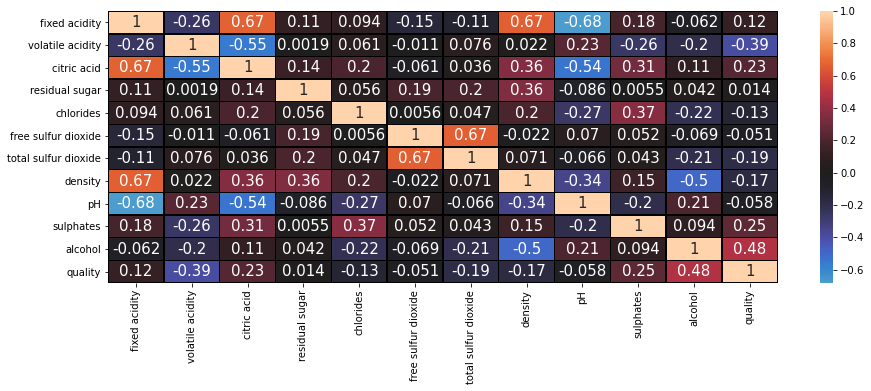

In [11]:
corr_matrix(df)

In [6]:
def numeric_feature_list(data):
    numeric_list=list(numeric_data(data).columns)
    return numeric_list
print(len(numeric_feature_list(df)))


12


In [7]:
#function distribution_histogram (arguments are list on numeric columns,number of row,nomer of columns
#figure size x,figuresize_Y,dataframe )
#functons should plot histograms for all numeric values in dataset, in number matric shape(nrow x ncolm we want)
def distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.distplot(x,ax=ax)
        except(IndexError):
            pass

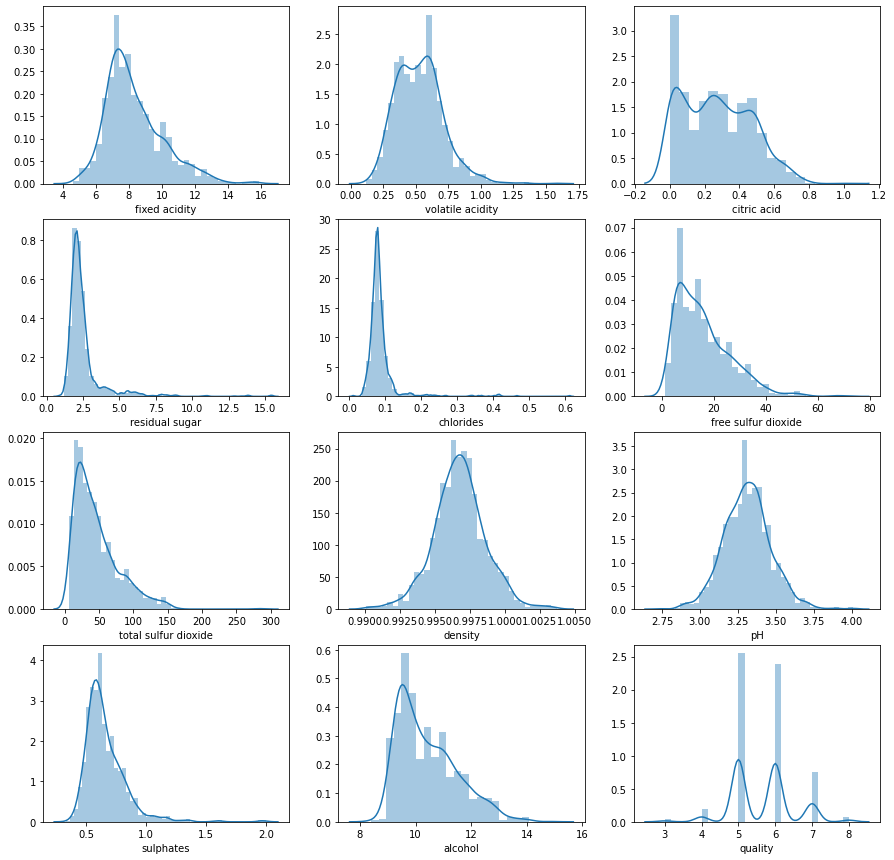

In [8]:
#call of distribution function that plot histograms for all numeric data
#first argument is list of numeric feature ( we make it by function numeric_feature_list)

distribution_histogram(numeric_feature_list(df),4,3,15,15,numeric_data(df))

In [9]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.boxplot(x,ax=ax)
        except(IndexError):
            pass

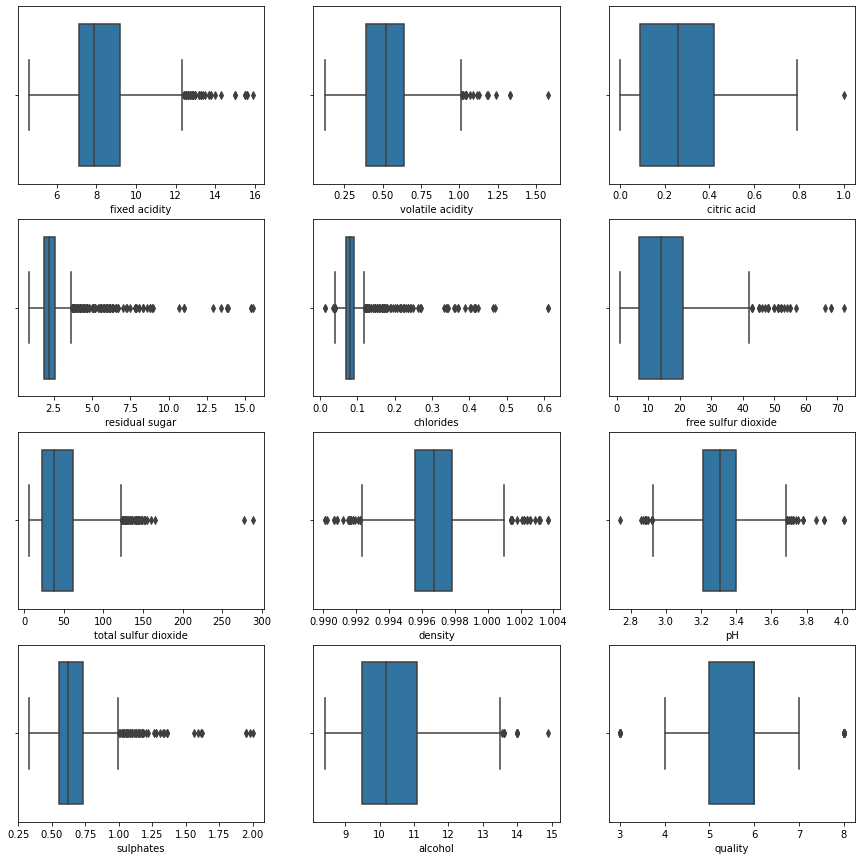

In [10]:
# #distribution_histogram(num_cols,4,3,10,10,df_num)
distribution_boxplot(numeric_feature_list(df),4,3,15,15,numeric_data(df))

In [12]:
def count_values(x_value,data_frame,rotation):
    fig=plt.gcf()
    fig.set_size_inches(20,10)
    plot = sns.countplot(x =x_value, data=data_frame)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation)
    
    
    
    

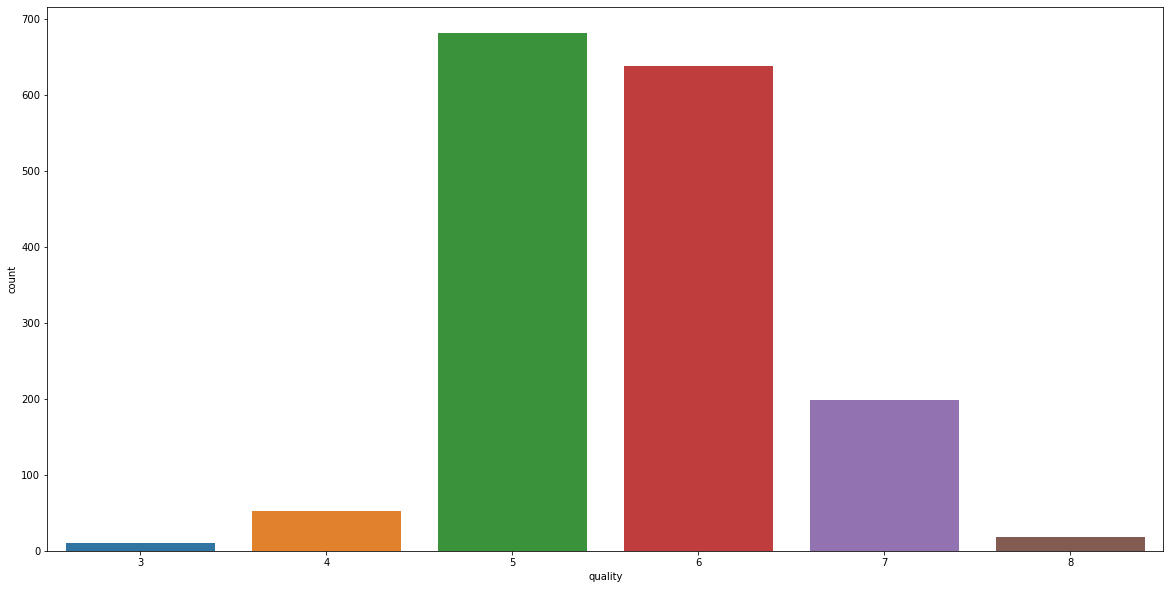

In [13]:
#count number of fire according to the month
count_values("quality",df,0)

In [14]:
#dependans of damage aeria according to the firecarasteristic
def dependant_feature_to_undependant(nrow,ncols,figsize1,figsize2,data_set,dependant_feature):
    list_value=numeric_feature_list(data_set)
    list_value.remove(dependant_feature)
    fig, axs = plt.subplots(nrows =nrow,ncols =ncols, figsize = (figsize1,figsize2))
    for i in range(0, len(list_value)):
        try:
            rows =i //ncols
            cols =i % ncols
            ax = axs[rows,cols]
            plot = sns.regplot(x = list_value[i], y = dependant_feature, data =data_set, ax=ax)
        except:
            pass

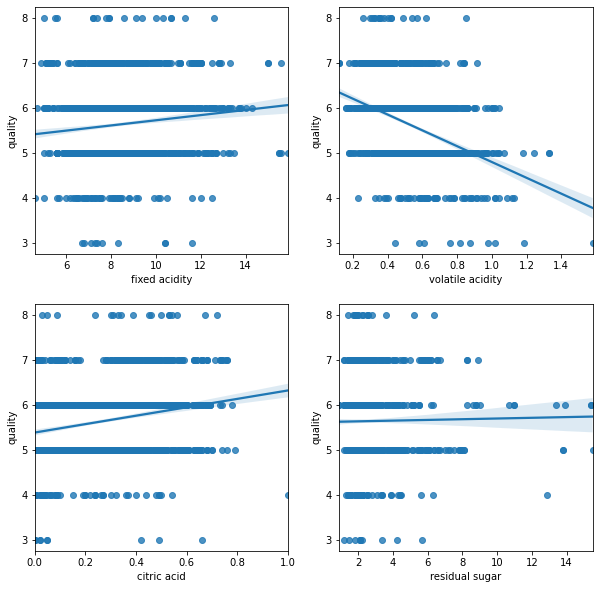

In [15]:
# dependans according to whole dataset
dependant_feature_to_undependant(2,2,10,10,df,"quality")

In [16]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.boxplot(x, y , data = data,ax=ax)
        except(IndexError):
            pass

In [17]:
def distribution_scatterplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.scatterplot(x, y , data = data,ax=ax,color="purple")
        except(IndexError):
            pass

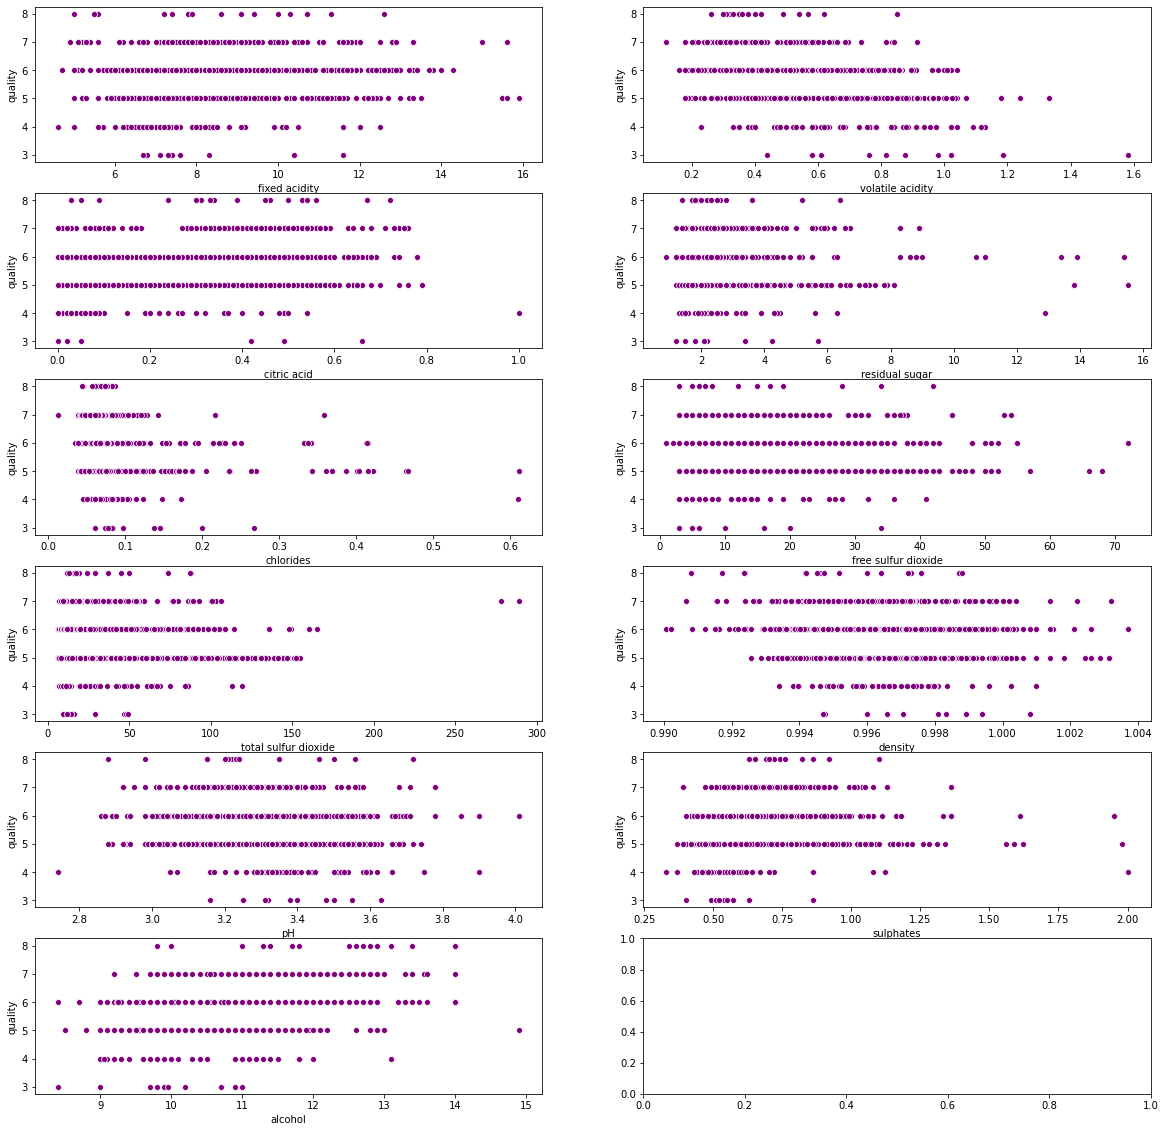

In [18]:
distribution_scatterplot(numeric_feature_list(df),6,2,20,20,df,"quality")

In [19]:
# First we will use LaberEncoder for nominal features with only to possible values
def label_Encoder(data,feature):
    from sklearn.preprocessing import LabelEncoder
    lab_enc = LabelEncoder()
    data['gen_lab'] = lab_enc.fit_transform(data[feature].values)
 



In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Split dataset on train and test

In [21]:
def split_data_set(data,dependant_feature,list_to_remove_X_test,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop(list_to_remove_X_test,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    df_norm = pd.DataFrame(data = X_train, columns =X_train.columns)
    return X_train,X_test,y_train,y_test,df_norm

In [28]:
X_train,X_test,y_train,y_test,df_norm=split_data_set(df,"quality",[],0.3)
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
92,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
1017,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1447,6.8,0.67,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
838,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7
40,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5


In [29]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(1119, 12)
 y_train shape:(1119,)
 X_test shape:(480, 12)
 y_test shape:(480,)


In [30]:
# Function for normalization of data in data set
def normalisation(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    norm = MinMaxScaler()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    return X_train_norm,X_test_norm

In [31]:
X_train_norm,X_test_norm=normalisation(X_train,X_test)

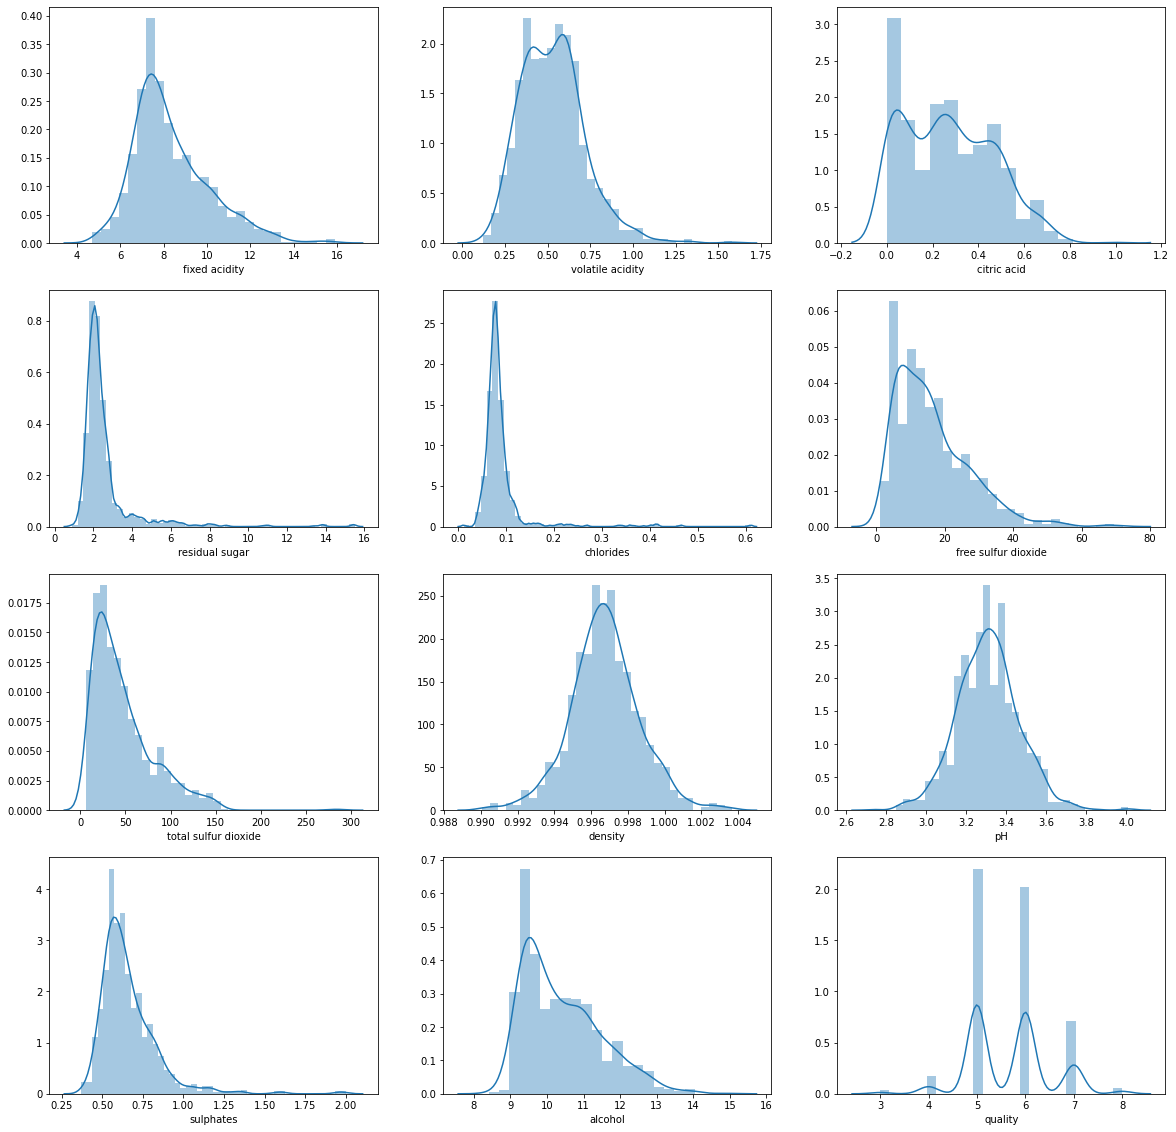

In [32]:
## plot normalized data
distribution_histogram(list(X_train.columns),4,3,20,20,df_norm)

In [33]:
# Function to standardize data 
def standardisation(X_train):
    from sklearn.preprocessing import StandardScaler
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    df_std = pd.DataFrame(data = X_train_std, columns = X_train.columns)
    return X_train_std,X_test_std,df_std

In [34]:
X_train_std,X_test_std,df_std=standardisation(X_train)

In [35]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(1119, 12)
 y_train shape:(1119,)
 X_test shape:(480, 12)
 y_test shape:(480,)


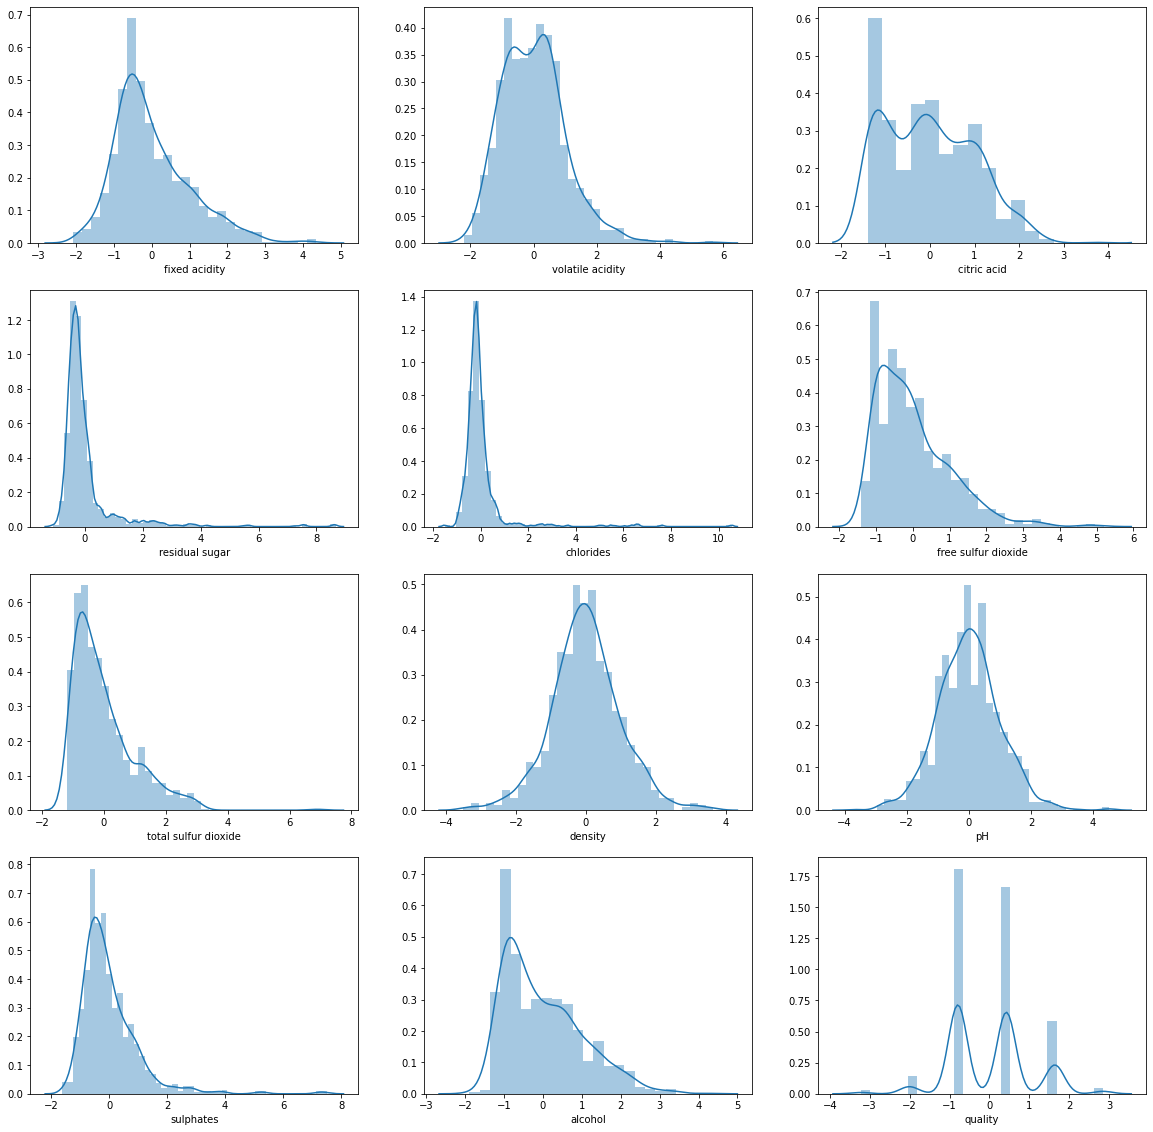

In [36]:
#plot standardized data
distribution_histogram(list(X_train.columns),4,3,20,20,df_std)

In [37]:
# import mean absolute and squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}
lista_modela=[]

# Import models that will be applied on dataset

#1.model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model_ime=lin_reg
lista_modela.append(model_ime)

#2.model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_ime=svr_linear
lista_modela.append(model_ime)

#3.model SVR_rbf
SVR_rbf=SVR()
model_ime=SVR_rbf
lista_modela.append(model_ime)

#4.model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_ime=ran_for_reg
lista_modela.append(model_ime)

#5.model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_ime=dec_tree_reg
lista_modela.append(model_ime)

#6.model ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
model_ime=extra_tree
lista_modela.append(model_ime)

#7.model BaggingRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_tree = BaggingRegressor(extra_tree, random_state=0)
model_ime=bag_tree
lista_modela.append(model_ime)

#8.model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
n_neighbor=KNeighborsRegressor()
model_ime=n_neighbor
lista_modela.append(model_ime)

#9.model Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
model_ime=ridge
lista_modela.append(model_ime)

#10.model Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
model_ime=lasso
lista_modela.append(model_ime)



In [38]:
#fuction model acespts arguments( model,X_train_std,y_train,X_test_std,y_test)
def model(model_ime,X_tr=X_train_std,y_tr=y_train,X_test_s=X_test_std,y_tst=y_test):
    #making model
    model_n=model_ime.fit(X_train_std,y_train)
    y_pred=model_n.predict(X_test_std)
    #mean absolut error
    MAE=mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    #appending errors to dictionary
    mean_sq_err_std[model_ime]=MSE
    mean_abs_err_std[model_ime]=MAE
    return(model_n,MAE,MSE,y_pred)


In [39]:
def unique_list_model(lista_modela):
    model_unique=[]
    for model in lista_modela:
        if model not in model_unique:
            model_unique.append(model)
    return(model_unique)

In [40]:
lista_mod=unique_list_model(lista_modela)
print(lista_mod)



[LinearRegression(), SVR(C=1, kernel='linear'), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), ExtraTreeRegressor(random_state=0), BaggingRegressor(base_estimator=ExtraTreeRegressor(random_state=0),
                 random_state=0), KNeighborsRegressor(), Ridge(), Lasso()]


In [41]:
for mod in lista_mod:
    model(mod)

In [42]:
#Results of models 
df_ERROR = pd.DataFrame({'models': [1,2,3,4,5,6,7,8,9,19],'MAE': list(mean_abs_err_std.values()),"MSE":list(mean_sq_err_std.values())})
df_ERROR

,models,MAE,MSE
0,1,2.710795e-16,2.814426e-31
1,2,2.713584e-02,1.167611e-03
2,3,8.481492e-02,3.070701e-02
3,4,0.000000e+00,0.000000e+00
4,5,0.000000e+00,0.000000e+00
5,6,0.000000e+00,0.000000e+00
6,7,4.166667e-04,4.166667e-05
7,8,1.387500e-01,8.508333e-02
8,9,6.908301e-04,8.060045e-07
9,19,6.494973e-01,5.926496e-01


In [43]:
#Reslut of estimation of MEAN SQUARED ERROR
lista_value_MSE=list(mean_sq_err_std.values())
Min_MSE=min(list(mean_sq_err_std.values()))
i=lista_value_MSE.index(Min_MSE)
print(f"Minimum of mean squared error is for model {lista_mod[i]},and value of MSE is {Min_MSE}")

Minimum of mean squared error is for model RandomForestRegressor(),and value of MSE is 0.0


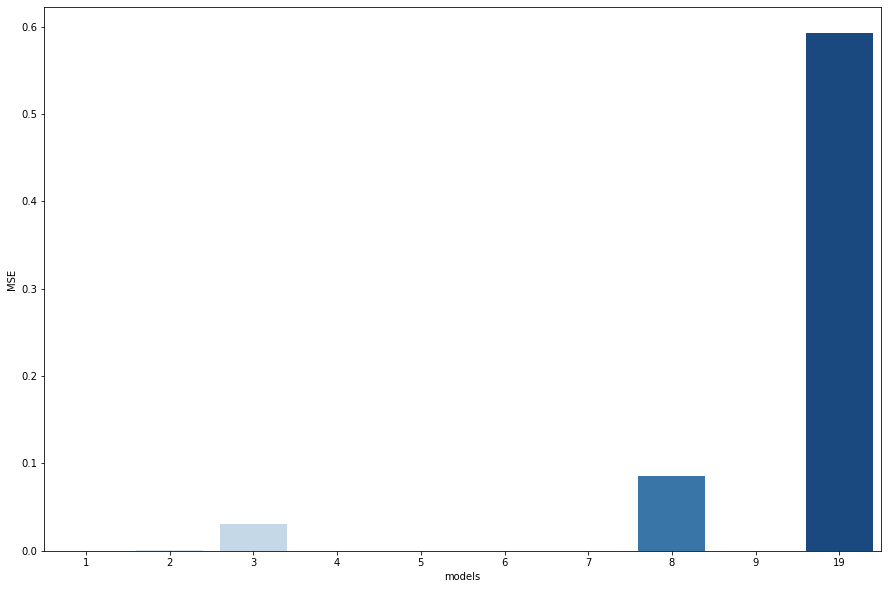

In [44]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MSE",palette="Blues",data=df_ERROR,ci=None)

In [45]:
#Reslut of estimation of MEAN APSOLUT ERROR
lista_value_MAE=list(mean_abs_err_std.values())
Min_MAE=min(list(mean_abs_err_std.values()))
i=lista_value_MAE.index(Min_MAE)
print(f"Minimum of mean apsolute error is for model {lista_mod[i]},and value of MAE is {Min_MAE}")

Minimum of mean apsolute error is for model RandomForestRegressor(),and value of MAE is 0.0


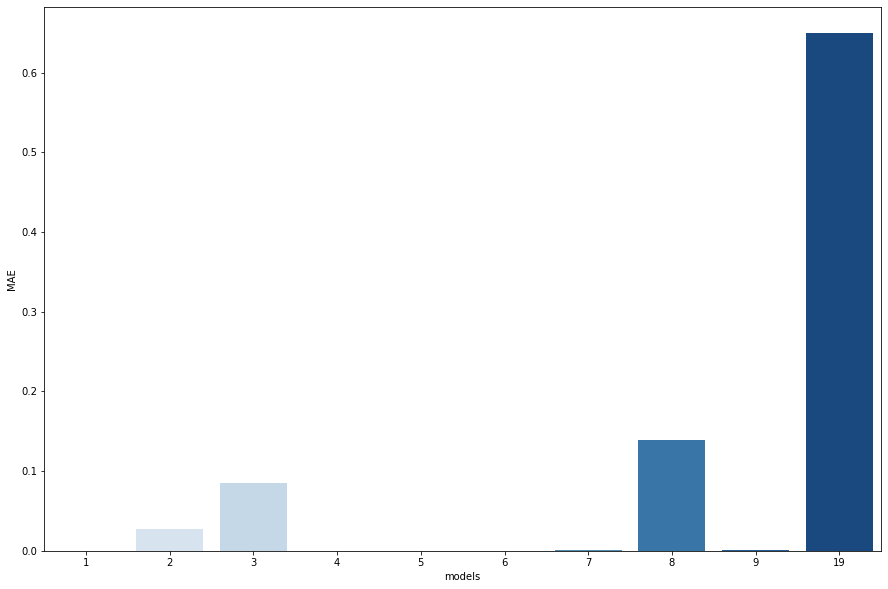

In [46]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MAE",palette="Blues",data=df_ERROR,ci=None)
